## Observations and Insights

In [1]:
%matplotlib notebook

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress



# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, 'left', on='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Creating a variable that will group by drug regimen and tumor volume 
grouping = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

#Tumor Volume mean for each Drug Regimen 
group_drugs_med = grouping.mean().round(3)

#Tumor Volume median for each Drug Regimen
group_drugs_mid = grouping.median().round(3)

#Tumor Volume variance for each Drug Regimen 
group_drugs_var = grouping.var().round(3)

#Tumor Volume standard deviation for each Drug Regimen 
group_drugs_std = grouping.std().round(3)

#Tumor Volume SEM for each Drug Regimen 
group_drugs_sem = grouping.sem().round(3)

#Creating summary table to display all relevant statistics
summ_stat_table = pd.DataFrame({"Mean Tumor Vol.": group_drugs_med, "Median Tumor Vol.": group_drugs_mid , "Tumor Vol. Variance":group_drugs_var, "Tumor Vol. Standard Deviation":group_drugs_std , "SEM": group_drugs_sem})
summ_stat_table

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

<IPython.core.display.Javascript object>


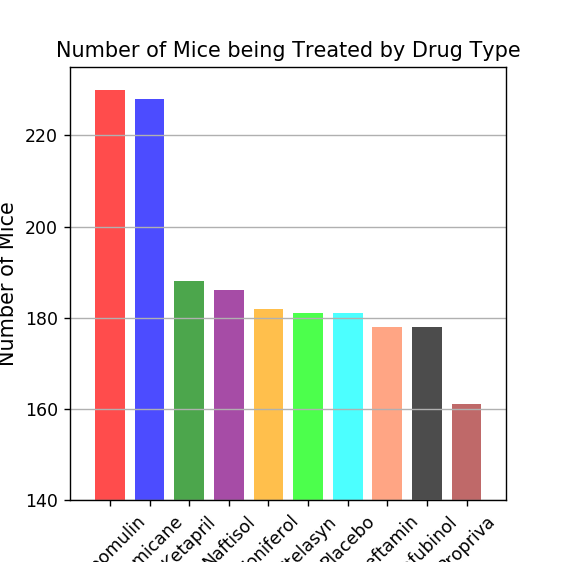

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#Creating Figure Size to properly fit and showcase all data within figure
#plt.figure(figsize=(4.5,4.5))

#Setting values for the y axis by counting all vlaues associated with each drug type
y_axis = combined_df['Drug Regimen'].value_counts()

#Creating a list of all drug types to assign values and colors to
drugs = combined_df['Drug Regimen'].unique()
                  
df = pd.DataFrame({"Drug Counts": y_axis, "Drugs": ['Capomulin','Ramicane' ,'Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Ceftamin','Infubinol','Propriva']})

#Colors which be placed on each drug from the above list
colors = ['red','blue' ,'green','purple','orange','lime','aqua','coral','black','brown']

df.plot.bar(x = "Drugs", y = "Drug Counts", color=colors, figsize=(4.5,4.5), width = .75, align = 'center', alpha = 0.7, legend=False)

#Setting titles and axis labels for the figure
plt.title('Number of Mice being Treated by Drug Type', fontsize = 12)
plt.ylabel('Number of Mice', fontsize = 12)
plt.xlabel('Type of Treatment', fontsize = 12)

#Formatting the values for the axis's to make sure readability is clear
plt.axis([-1,10,140,max(y_axis)+5])

#Rotating x axis labels so they don't overlap
plt.xticks(rotation=45)

#Adding horizontal grid bars
plt.grid(axis='y')

#display figure
plt.show()

<IPython.core.display.Javascript object>


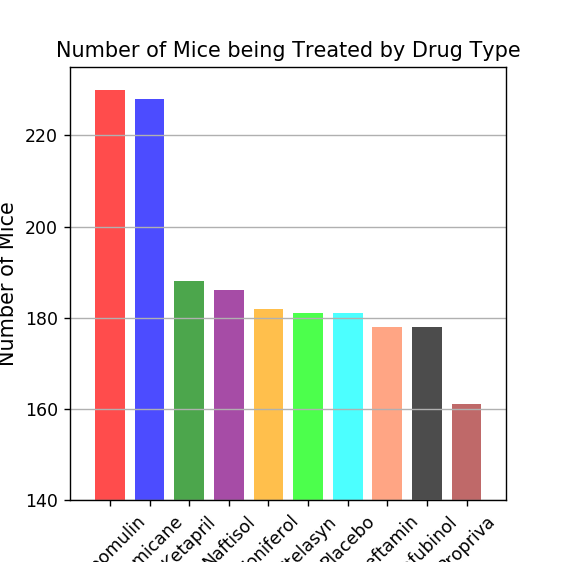

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Creating Figure Size to properly fit and showcase all data within figure
plt.figure(figsize=(4.5,4.5))

#Setting values for the y axis by counting all vlaues associated with each drug type
y_axis = combined_df['Drug Regimen'].value_counts()

#Creating a list of all drug types to assign values and colors to
x_axis = ['Capomulin','Ramicane' ,'Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Ceftamin','Infubinol','Propriva']

#Colors which be placed on each drug from the above list
colors = ['red','blue' ,'green','purple','orange','lime','aqua','coral','black','brown']

#creating the bar chart itself, with colors set to color list above, centered formatting, and width slightly less than 1
plt.bar(x_axis, y_axis, color = colors, width = .75, align = 'center', alpha = 0.7)

#Setting titles and axis labels for the figure
plt.title('Number of Mice being Treated by Drug Type', fontsize = 12)
plt.ylabel('Number of Mice', fontsize = 12)
plt.xlabel('Type of Treatment', fontsize = 12)

#Formatting the values for the axis's to make sure readability is clear
plt.axis([-1,10,140,max(y_axis)+5])

#Rotating x axis labels so they don't overlap
plt.xticks(rotation=45)

#Adding horizontal grid bars
plt.grid(axis='y')

#display figure
plt.show()

## Pie plots

<IPython.core.display.Javascript object>


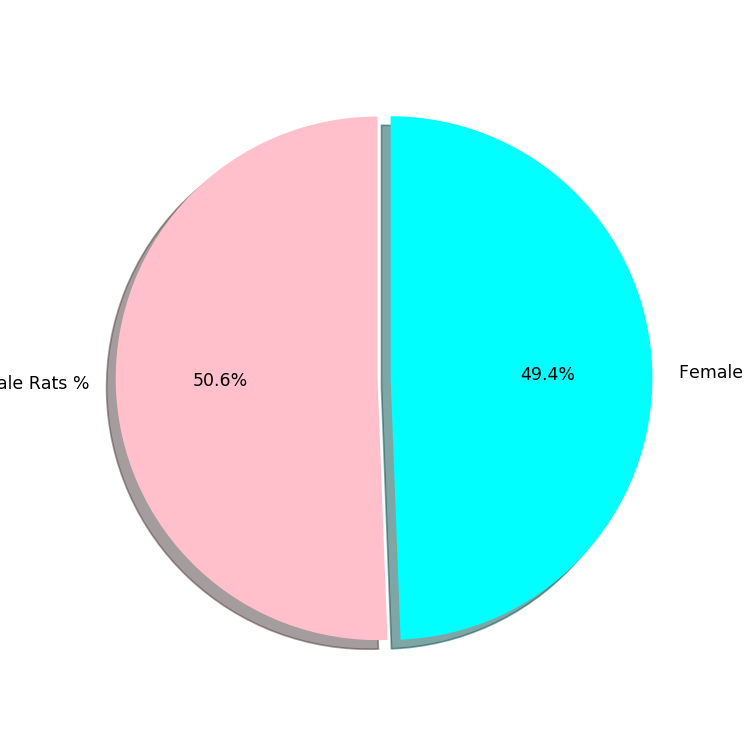

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Setting values for the y axis by counting all values associated with each gender
gender_counts = combined_df['Sex'].value_counts()

#Creating Figure Size to properly fit and showcase all data within figure
gender_df = pd.DataFrame({"Gender Counts": gender_counts, "Genders": ['Male Rats %','Female Rats %']})

#Colors to be placed on each gender from the above array
colors = ['pink','aqua']

#Explode the figure to showcase that males are majority
explode = (0.05,0)

#Creating the pie chart, with arguments to choose color, labels, formatting, etc. 
gender_pie = gender_df.plot.pie(y ='Gender Counts', labels = ["Male Rats %","Female Rats %"] , colors = colors, figsize=(6,6), explode = explode, autopct="%1.1f%%", shadow=True, startangle=90, legend = False)

#Formatting to blank out redundant labeling, and make the pie chart a circle. 
plt.axis('equal')
plt.ylabel("")
plt.show()

<IPython.core.display.Javascript object>


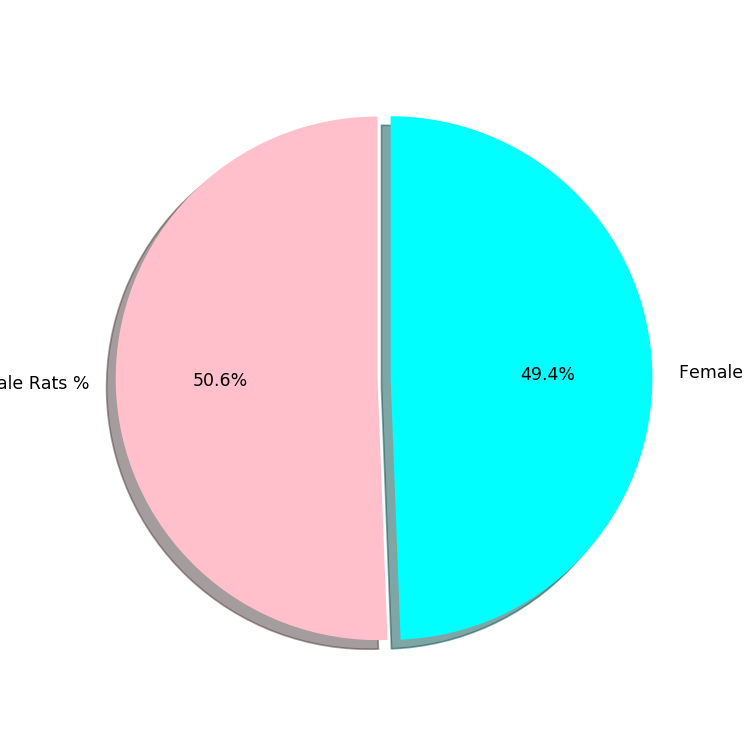

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Creating Figure Size to properly fit and showcase all data within figure
plt.figure(figsize=(6,6))

#Setting values for the y axis by counting all values associated with each gender
gender_counts = combined_df['Sex'].value_counts()

#Creating an array of male and female
genders = ['Male Rats %','Female Rats %']

#Colors to be placed on each gender from the above array
colors = ['pink','aqua']

#Explode the figure to showcase that males are majority
explode = (0.05,0)

#Creating pie chart and including shadows, colors, explosion, rotation angle, labels, and values. 
plt.pie(gender_counts, explode=explode, labels=genders, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)

#Guarantees that the pie chart is a circle and not an oval or some egg shape
plt.axis('equal')
plt.show()

In [10]:
df_2 = combined_df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen", "Weight (g)"]]
cap = df_2.loc[df_2['Drug Regimen'] == 'Capomulin']
cap = cap.groupby("Mouse ID").tail(1)

ram = df_2.loc[df_2['Drug Regimen'] == 'Ramicane']
ram = ram.groupby("Mouse ID").tail(1)

inf = df_2.loc[df_2['Drug Regimen'] == 'Infubinol']
inf = inf.groupby("Mouse ID").tail(1)

cef = df_2.loc[df_2['Drug Regimen'] == 'Ceftamin']
cef = cef.groupby("Mouse ID").tail(1)


In [11]:
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
combine_group_mean = df_2.groupby(["Drug Regimen","Timepoint"]).mean()
combine_group_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(combine_group_mean)

# Preview DataFrame 
tumor_response_mean_df

,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
0,Capomulin,0,45.000000,20.120000
1,Capomulin,5,44.266086,20.120000
2,Capomulin,10,43.084291,20.120000
3,Capomulin,15,42.064317,20.000000
4,Capomulin,20,40.716325,19.782609
...,...,...,...,...
95,Zoniferol,25,55.432935,27.687500
96,Zoniferol,30,57.713531,27.733333
97,Zoniferol,35,60.089372,27.571429
98,Zoniferol,40,62.916692,27.571429


In [23]:
#Re-Format the Data Frames to isolate focused drugs, grouped by timepoint and tumor volume
pivot_table = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug Regimen', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

#Isolate the four drugs which will be analyzed in the last half of the assignment to analyze tumor volume.
table_fourdrugs = pivot_table[["Timepoint", "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]

#Re-Format the Data Frames to isolate focused drugs, grouped by timepoint and weight in grams
pivot_table_weight = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug Regimen', values = "Weight (g)")
pivot_table_weight.reset_index(level = None, inplace = True)

#Isolate the four drugs which will be analyzed in the last half of the assignment.
table_fourdrugs_weight = pivot_table_weight[["Timepoint", "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]

## Quartiles, outliers and boxplots

In [24]:
#Create a table to hold all max, min, values for the drugs in the data
maxmin_table = grouping.agg(['sum', 'min', 'max'])

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens 
final_cap = maxmin_table.loc['Capomulin',['min']].min()
final_ram = maxmin_table.loc['Ramicane',['min']].min()
final_inf = maxmin_table.loc['Infubinol',['max']].max()
final_cef = maxmin_table.loc['Ceftamin',['max']].max()

final_volumes = [final_cap, final_ram, final_inf, final_cef]
print(f"Final Tumor Volumes for: Capomulin = {round(final_cap,3)},  Ramicane = {round(final_ram,3)}, Infubinol = {round(final_inf,3)}, Ceftamin = {round(final_cef,3)}")


Final Tumor Volumes for: Capomulin = 23.344,  Ramicane = 22.05, Infubinol = 72.227, Ceftamin = 68.923


In [25]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#List used to hold all of the drugs which will be looped later on
quartiles = cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#Print statements to diplay data for Capomulin:
print(f"Capomulin IQR Info:" +"\n")
print(f"The lower quartile of tumor volume is: {round(lowerq,2)}")
print(f"The upper quartile of tumor volume is: {round(upperq,2)}")
print(f"The interquartile range of tumor volume is: {round(iqr,2)}")
print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers." +"\n")

quartiles = ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#Print statements to diplay data for Ramicane:
print(f"Ramicane IQR Info:" +"\n")
print(f"The lower quartile of tumor volume is: {round(lowerq,2)}")
print(f"The upper quartile of tumor volume is: {round(upperq,2)}")
print(f"The interquartile range of tumor volume is: {round(iqr,2)}")
print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers." +"\n")

quartiles = inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#Print statements to diplay data for Infubinol:
print(f"Infubinol IQR Info:" +"\n")
print(f"The lower quartile of tumor volume is: {round(lowerq,2)}")
print(f"The upper quartile of tumor volume is: {round(upperq,2)}")
print(f"The interquartile range of tumor volume is: {round(iqr,2)}")
print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers." +"\n")

quartiles = cef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#Print statements to diplay data for Ceftamin:
print(f"Ceftamin IQR Info:" +"\n")
print(f"The lower quartile of tumor volume is: {round(lowerq,2)}")
print(f"The upper quartile of tumor volume is: {round(upperq,2)}")
print(f"The interquartile range of tumor volume is: {round(iqr,2)}")
print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers." +"\n")  

Capomulin IQR Info:

The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The the median of tumor volume is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.

Ramicane IQR Info:

The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.1
The the median of tumor volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Infubinol IQR Info:

The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The the median of tumor volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.

Ceftamin IQR Info:

The lower quartile of tumor volume is: 48.72
The upper quartile of tumor volume is: 64.3
The interquartile range of tumor volume is: 15.58
The th

<IPython.core.display.Javascript object>


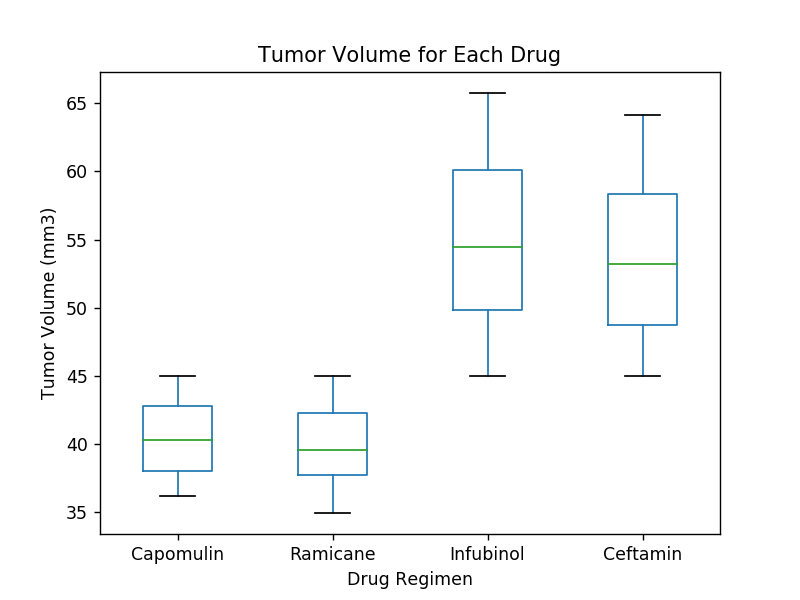

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
table_fourdrugs.boxplot(column =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], grid = False)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Tumor Volume for Each Drug')
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


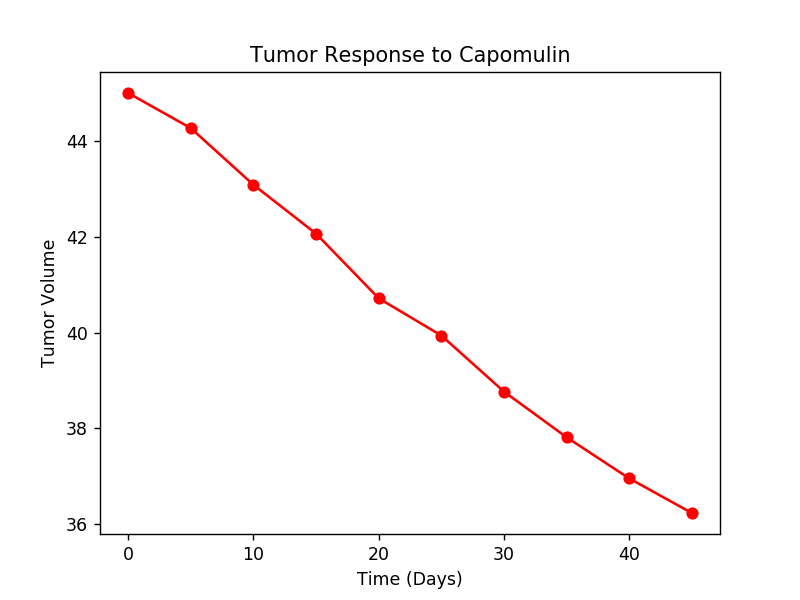

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Creating line plot to show relationship between tumor volume and time
time_cap = plt.plot(table_fourdrugs['Timepoint'],table_fourdrugs['Capomulin'], marker='o', color = 'red')

#Formatting to make the graph easier to undertsand
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume')
plt.title('Tumor Response to Capomulin')
plt.show() 

<IPython.core.display.Javascript object>


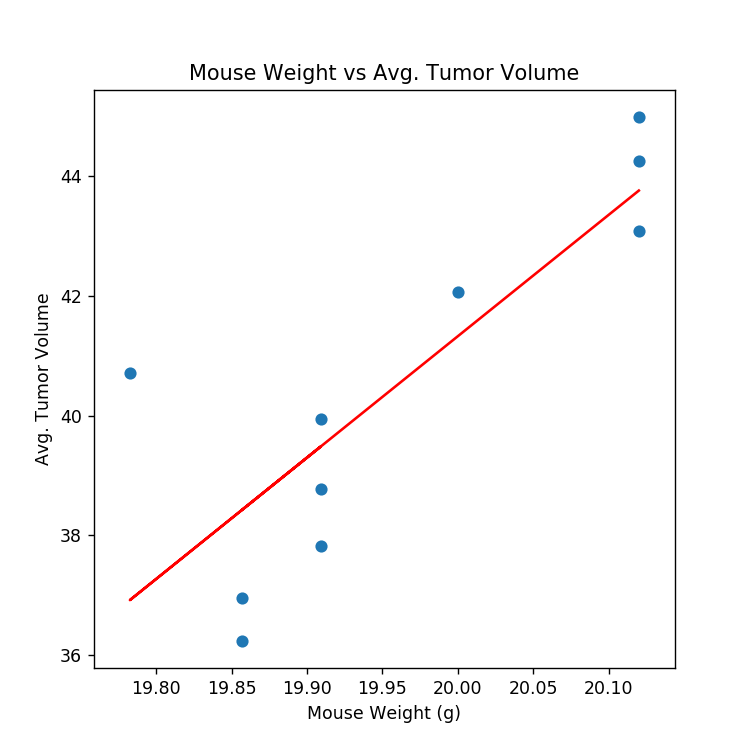

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure(figsize=(6,6))
x = table_fourdrugs_weight['Capomulin']
y = table_fourdrugs['Capomulin']

#Create scattr plot to show relationship between tumor volume and mouse weight
plt.scatter(x, y ,marker = "o")

#Labels to make the graph easier to digest
plt.ylabel('Avg. Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.title('Mouse Weight vs Avg. Tumor Volume')

#Creating the equation and format for the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Tumor Volume (mm3), Weight (g), linear regression should fit on top of scatter plot. 
correlation = st.pearsonr(x,y)
print(f"The correlation between weight and tumor volume is {round(correlation[0],3)} for Capomulin")

The correlation between weight and tumor volume is 0.821 for Capomulin


## Analysis:

Capomulin and Ramicane are the two most popular drug regimens, both reduce average tumor volume over time, unlike all of the other drugs being tested. The least effective drug according to the data appears to be Ketapril which had the effect of increasing tumor volume over time. 

There is a strong correlation between mouse weight and tumor volume, this combined with the reducing of tumor volume over time suggests that it may be the most effective drug in the trial for anti-cancer purposes. Ramicane could potentially be a better candidate, more testing would be necessary to verify. 

The trial should be repeated again with a larger sample size in order to replicate results, with a data set this small any conclusions should not be taken as the absolute truth. 